In [462]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pylab as pl

In [463]:
# Implement your Naive Bayes Classifier [pred, posterior, err] = myNB(X,Y,X test,Y test)
# whose inputs are the training data X, labels Y for X, testing data X test and labels Y test for X test
# and returns predicted labels pred, posterior probability posterior with which the prediction was made
# and error rate err. Assume Gaussian (normal) distribution on the data.

def myNB(X,Y,X_test,Y_test):
    
    import math
    def mean(numbers):
        return sum(numbers)/float(len(numbers))

    def stdev(numbers):
        avg = mean(numbers)
        variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
        return math.sqrt(variance)
    
    AttributeXforZero = []
    AttributeYforZero = []
    for i in range(labelZero):
        AttributeXforZero.append(X[0][i])
        AttributeYforZero.append(X[1][i])
        
#     print("AttributeXforZero: ", AttributeXforZero, "\n")
    
    meanXforZero = mean(AttributeXforZero)
#     print("meanXforZero: ", meanXforZero, "\n")
    stdXforZero = stdev(AttributeXforZero)
#     print("stdXforZero: ", stdXforZero, "\n")
    
#     print("AttributeYforZero: ", AttributeYforZero, "\n")
    
    meanYforZero = mean(AttributeYforZero)
#     print("meanYforZero: ", meanYforZero, "\n")
    stdYforZero = stdev(AttributeYforZero)
#     print("stdYforZero: ", stdYforZero, "\n")
    
    AttributeXforOne = []
    AttributeYforOne = []
    loopV = labelOne + labelZero 
    for i in range(labelZero, loopV):
        AttributeXforOne.append(X[0][i])
        AttributeYforOne.append(X[1][i])
    
#     print("AttributeXforOne: ", AttributeXforOne, "\n")
    
    meanXforOne = mean(AttributeXforOne)
#     print("meanXforOne: ", meanXforOne, "\n")
    stdXforOne = stdev(AttributeXforOne)
#     print("stdXforOne: ", stdXforOne, "\n")
    
#     print("AttributeYforOne: ", AttributeYforOne, "\n")
    
    meanYforOne = mean(AttributeYforOne)
#     print("meanYforOne: ", meanYforOne, "\n")
    stdYforOne = stdev(AttributeYforOne)
#     print("stdYforOne: ", stdYforOne, "\n")

#    ---- Plotting Training Dataset with Label 0 and Label 1 ----

    pl.figure(figsize=(10,10))

    c1 = pl.scatter(AttributeXforZero,AttributeYforZero,c='r',marker='o')
    c2 = pl.scatter(AttributeXforOne,AttributeYforOne,c='b',marker='o')
    pl.legend([c1, c2], ['Label 0', 'Label 1'])
    pl.title("Training dataset with Labels = 0 & 1")
    pl.show()   
    
#   -------------------------------------------------------------

    AttributeXforZero_test = []
    AttributeYforZero_test = []
    for i in range(labelZero_test):
        AttributeXforZero_test.append(X_test[0][i])
        AttributeYforZero_test.append(X_test[1][i])
        
    AttributeXforOne_test = []
    AttributeYforOne_test = []
    loopV_test = labelOne_test + labelZero_test 
    for i in range(labelZero_test, loopV_test):
        AttributeXforOne_test.append(X_test[0][i])
        AttributeYforOne_test.append(X_test[1][i])
    
    def calculateProbability(x, mean, stdev):
        exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
        return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
    
    ProbX1forZero = []
    for i in range(0, int(len((AttributeXforZero_test)))):
        ProbX1forZero.append(calculateProbability(AttributeXforZero_test[i], meanXforZero, stdXforZero))
#     print("ProbX1forZero: ", ProbX1forZero, "\n")
    
    ProbY1forZero = []
    for i in range(0, int(len((AttributeYforZero_test)))):
        ProbY1forZero.append(calculateProbability(AttributeYforZero_test[i], meanYforZero, stdYforZero))
#     print("ProbY1forZero: ", ProbY1forZero, "\n")
    
    ProbX2forZero = []
    for i in range(0, int(len((AttributeXforOne_test)))):
        ProbX2forZero.append(calculateProbability(AttributeXforOne_test[i], meanXforZero, stdXforZero))
#     print("ProbX2forZero: ", ProbX2forZero, "\n")
    
    ProbY2forZero = []
    for i in range(0, int(len((AttributeYforOne_test)))):
        ProbY2forZero.append(calculateProbability(AttributeYforOne_test[i], meanYforZero, stdYforZero))
#     print("ProbY2forZero: ", ProbY2forZero, "\n")
    
    ProbX1forOne = []
    for i in range(0, int(len((AttributeXforZero_test)))):
        ProbX1forOne.append(calculateProbability(AttributeXforZero_test[i], meanXforOne, stdXforOne))
#     print("ProbX1forOne: ", ProbX1forOne, "\n")
    
    ProbY1forOne = []
    for i in range(0, int(len((AttributeYforZero_test)))):
        ProbY1forOne.append(calculateProbability(AttributeYforZero_test[i], meanYforOne, stdYforOne))
#     print("ProbY1forOne: ", ProbY1forOne, "\n")
   
    ProbX2forOne = []
    for i in range(0, int(len((AttributeXforOne_test)))):
        ProbX2forOne.append(calculateProbability(AttributeXforOne_test[i], meanXforOne, stdXforOne))
#     print("ProbX2forOne: ", ProbX2forOne, "\n")
    
    ProbY2forOne = []
    for i in range(0, int(len((AttributeYforOne_test)))):
        ProbY2forOne.append(calculateProbability(AttributeYforOne_test[i], meanYforOne, stdYforOne))
#     print("ProbY2forOne: ", ProbY2forOne, "\n")
    
#   Prior Probabilities
    probZero = labelZero / (labelZero + labelOne)
#     print("P(Zero): ", probZero, "\n")
    probOne = labelOne / (labelZero + labelOne)
#     print("P(One): ", probOne, "\n")
    
    fprobZeroforX1 = []
    for i in range(labelZero_test):
        fprobZeroforX1.append(ProbX1forZero[i]*ProbY1forZero[i]*probZero)
#     print("P(Zero/AttributeX1): ", fprobZeroforX1, "\n")
    
    fprobOneforX1 = []
    for i in range(labelZero_test):
        fprobOneforX1.append(ProbX1forOne[i]*ProbY1forOne[i]*probOne)
#     print("P(One/AttributeX1): ", fprobOneforX1, "\n")
    
    fprobZeroforX2 = []
    for i in range(labelOne_test):
        fprobZeroforX2.append(ProbX2forZero[i]*ProbY2forZero[i]*probZero)
#     print("P(Zero/AttributeX2): ", fprobZeroforX2, "\n")
    
    fprobOneforX2 = []
    for i in range(labelOne_test):
        fprobOneforX2.append(ProbX2forOne[i]*ProbY2forOne[i]*probOne)
#     print("P(One/AttributeX2): ", fprobOneforX2, "\n")
    
    pred = []
    posterior = []
    for i in range(labelZero_test):
        if(fprobZeroforX1[i] > fprobOneforX1[i]):
            posterior.append(fprobZeroforX1[i])
            pred.append(0)
        else:
            pred.append(1)
            posterior.append(fprobOneforX1[i])
                
    for i in range(labelOne_test):
        if(fprobZeroforX2[i] > fprobOneforX2[i]):
            posterior.append(fprobZeroforX2[i])
            pred.append(0)
        else:
            pred.append(1)
            posterior.append(fprobOneforX2[i])
    
    y_true = Y_test
#     print("True Labels: ", y_true, "\n")
    y_pred = pred
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print("TN: {}, FP: {}, FN: {}, TP: {}".format(tn, fp, fn, tp), "\n")
    accuracy = ((tp+tn)/(tn+fp+fn+tp))
    print("Accuracy: ", accuracy, "\n")
    precision = (tp/(tp+fp))
    print("Precision: ", precision, "\n")
    recall = (tp/(tp+fn))
    print("Recall: ", recall, "\n")
    err = (1 - accuracy)*100
    
#     print("Predicted Labels: ", pred, "\n") 
#     print("Posterior Probability: ", posterior, "\n" )
    print("Error Rate : {}%".format(round(err, 2)), "\n" )
    
#    ---- Plotting Predicated Dataset with Label 0 and Label 1 ----

    pl.figure(figsize=(10,10))
    
    
    for i in range(labelZero_test):
        if pred[i] == 0:
            c1 = pl.scatter(AttributeXforZero_test,AttributeYforZero_test,c='r',marker='o')
        else:
            c2 = pl.scatter(AttributeXforZero_test,AttributeYforZero_test,c='b',marker='o')
            
    for i in range(labelZero_test, loopV_test):
        if pred[i] == 0:
            c1 = pl.scatter(AttributeXforOne_test,AttributeYforOne_test,c='r',marker='o')
        else:
            c2 = pl.scatter(AttributeXforOne_test,AttributeYforOne_test,c='b',marker='o')
            
    pl.legend([c1, c2], ['Label 0', 'Label 1'])
    pl.title("Test dataset with Labels = 0 & 1")
    pl.show()  
    
#   ----------------------------------------------------------

#    Calculating TPR( True Positive Rate ) & FPR ( False Positive Rate) , Plotting ROC Curve

    tpr = []
    fpr = []
    count_tp = 0
    count_fn = 0
    count_fp = 0
    count_tn = 0
    Y_test.reverse()
#     print("Reversed Test Data: ", Y_test, "\n")
    pred.reverse()
#     print("Reversed Pred Data: ", pred, "\n")
    
    for i in range(len(Y_test)):
        if(Y_test[i] == 1 and pred[i] == 1):
            count_tp += 1
#             print('tp: ', count_tp)
        elif(Y_test[i] == 1 and pred[i] == 0):
            count_fn += 1
#             print('fn: ', count_fn)
        elif(Y_test[i] == 0 and pred[i] == 1):
            count_fp += 1
#             print('fp: ', count_fp)
        else:
            count_tn += 1
#             print('tn: ', count_tn)
        
        if(i!=0):
            tpr.append((tpr[i-1]) + (count_tp/labelOne_test))
        else:
            tpr.append(count_tp/labelOne_test)
        
        if(i!=0):
            fpr.append((fpr[i-1]) + (count_fp/labelZero_test))
        else:
            fpr.append(count_fp/labelZero_test)
        
#     print("tpr: ", tpr)
#     print("fpr: ", fpr)
    plt.figure(figsize=(10,7))
    plt.xlabel('FPR (False Positive Rate)')
    plt.ylabel('TPR (True Positive Rate)')
#     sns.set(color_codes=True)
    plt.plot(fpr, tpr)
    plt.title('ROC Curve for {} train datapoints & {} test datapoints'.format(len(Y), len(Y_test)))
    plt.grid(True)
    
    
#     -------------------------------------------------------------------------------------------

    def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if not title:
            if normalize:
                title = 'Normalized confusion matrix'
            else:
                title = 'Confusion matrix, without normalization'

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        # Only use the labels that appear in the data
#         classes = classes[unique_labels(y_true, y_pred)]
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        fig, ax = plt.subplots()
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        # We want to show all ticks...
        ax.set(xticks=np.arange(cm.shape[1]),
               yticks=np.arange(cm.shape[0]),
               # ... and label them with the respective list entries
               xticklabels=classes, yticklabels=classes,
               title=title,
               ylabel='True label',
               xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
        fig.tight_layout()
        return ax


    np.set_printoptions(precision=2)
    class_names = ['label0' , 'label1']

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(Y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plot_confusion_matrix(Y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')

    plt.show()
    
    
    return(pred, posterior, err)     

    

Number of Training Data Points: 1000 

Number of Label 0: 700 

Number of Label 1: 300 

TN: 500, FP: 0, FN: 393, TP: 107 

Accuracy:  0.607 

Precision:  1.0 

Recall:  0.214 

Error Rate : 39.3% 



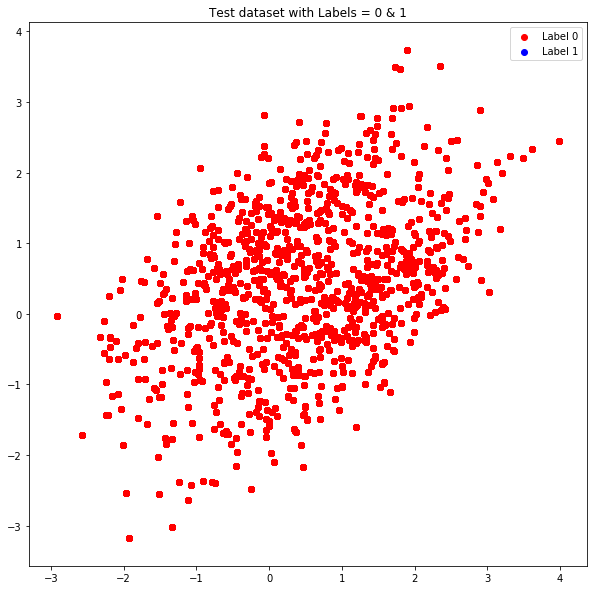

Confusion matrix, without normalization
[[500   0]
 [393 107]]
Normalized confusion matrix
[[1.   0.  ]
 [0.79 0.21]]


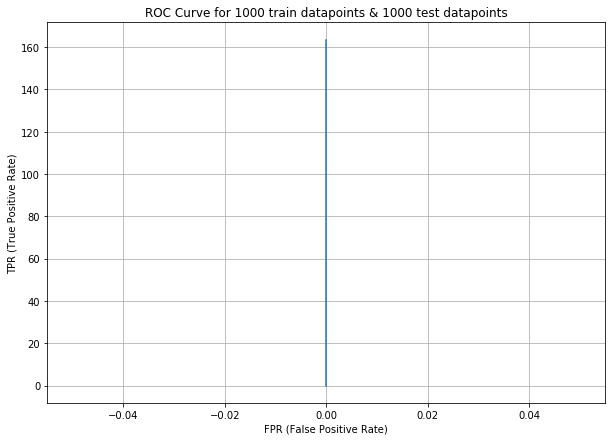

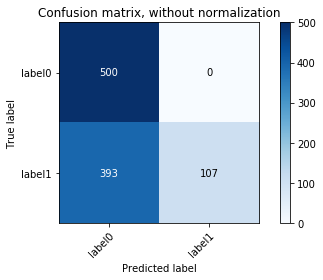

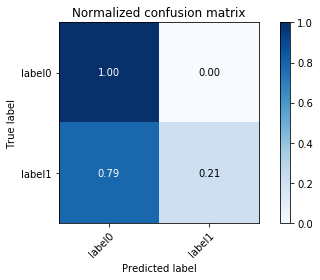

In [464]:
mean1 = [1,0]
mean2 = [0,1]
Sigma1 = [[1,0.75],[0.75,1]]
Sigma2 = [[1,0.75],[0.75,1]]

initial_train = 500
x1, y1 = np.random.multivariate_normal(mean1, Sigma1, initial_train).T
x2, y2 = np.random.multivariate_normal(mean2, Sigma2, initial_train).T
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2]) 
X = [x,y]
# print("Training Dataset: ", X, "\n")

initial_test = 500
x1, y1 = np.random.multivariate_normal(mean1, Sigma1, initial_test).T
x2, y2 = np.random.multivariate_normal(mean2, Sigma2, initial_test).T
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2]) 
X_test = [x,y]
# print("Testing Dataset: ", X_test, "\n")

# Dataset1 = np.random.multivariate_normal(mean1, Sigma1, initial)
# Dataset2 = np.random.multivariate_normal(mean2, Sigma2, initial)
# Dataset = np.concatenate((Dataset1,Dataset2),axis=0)
# print(Dataset)

Y = []
labelZero = 0
labelOne = 0
for i in range(initial_train):
    Y.append(0)
    labelZero += 1
for i in range(initial_train):
    Y.append(1)
    labelOne += 1
# print("Train Labels: ", Y, "\n")
# print(labelZero)
# print(labelOne)
print("Number of Training Data Points: {}".format(labelZero + labelOne), "\n")
print("Number of Label 0: {}".format(labelZero), "\n")
print("Number of Label 1: {}".format(labelOne), "\n")

Y_test = []
labelZero_test = 0
labelOne_test = 0
for i in range(initial_test):
    Y_test.append(0)
    labelZero_test += 1
for i in range(initial_test):
    Y_test.append(1)
    labelOne_test += 1
# print("Test Labels: ", Y_test, "\n")
# print(labelZero)
# print(labelOne)

myNBClassifier = myNB(X,Y,X_test,Y_test)
# print("myNBClassifier: ", myNBClassifier, "\n")